In [53]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt

In [54]:
df = pd.read_csv('https://github.com/MyungKyuYi/AI-class/raw/refs/heads/main/abalone.csv')
df.head()

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [55]:
df.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [56]:
df = df.drop(columns = ['id'])
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [57]:
df['Sex'].value_counts()

Sex
M    1528
I    1342
F    1307
Name: count, dtype: int64

In [58]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

df['Sex'].value_counts()

Sex
2    1528
1    1342
0    1307
Name: count, dtype: int64

In [63]:
X = df.drop(columns = ['Rings']).values
y = df['Rings'].values

X, y

(array([[2.    , 0.455 , 0.365 , ..., 0.2245, 0.101 , 0.15  ],
        [2.    , 0.35  , 0.265 , ..., 0.0995, 0.0485, 0.07  ],
        [0.    , 0.53  , 0.42  , ..., 0.2565, 0.1415, 0.21  ],
        ...,
        [2.    , 0.6   , 0.475 , ..., 0.5255, 0.2875, 0.308 ],
        [0.    , 0.625 , 0.485 , ..., 0.531 , 0.261 , 0.296 ],
        [2.    , 0.71  , 0.555 , ..., 0.9455, 0.3765, 0.495 ]]),
 array([15,  7,  9, ...,  9, 10, 12], dtype=int64))

In [62]:
Y = pd.get_dummies(y).values
Y

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1557)
print("학습 데이터 개수:", len(X_train))
print("테스트 데이터 개수:", len(y_train))

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

학습 데이터 개수: 3341
테스트 데이터 개수: 3341
(3341, 8) (836, 8)
(3341, 28) (836, 28)


In [72]:
model = Sequential()

model.add(Dense(10, input_shape = (8, ), activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(6, activation = 'relu'))
model.add(Dense(1))

model.compile(RMSprop(learning_rate=0.04), loss='mean_squared_error', metrics=['mse'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                90        
                                                                 
 dense_1 (Dense)             (None, 8)                 88        
                                                                 
 dense_2 (Dense)             (None, 6)                 54        
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 239
Trainable params: 239
Non-trainable params: 0
_________________________________________________________________


In [73]:
model_history = model.fit(X_train, y_train, epochs = 30, batch_size = 32, validation_split = 0.1)

Epoch 1/30
94/94 [==============================] - 1s 3ms/step - loss: 0.0372 - mse: 0.0372 - val_loss: 0.0348 - val_mse: 0.0348
Epoch 2/30
94/94 [==============================] - 0s 2ms/step - loss: 0.0348 - mse: 0.0348 - val_loss: 0.0348 - val_mse: 0.0348
Epoch 3/30
94/94 [==============================] - 0s 2ms/step - loss: 0.0348 - mse: 0.0348 - val_loss: 0.0348 - val_mse: 0.0348
Epoch 4/30
94/94 [==============================] - 0s 2ms/step - loss: 0.0348 - mse: 0.0348 - val_loss: 0.0348 - val_mse: 0.0348
Epoch 5/30
94/94 [==============================] - 0s 2ms/step - loss: 0.0348 - mse: 0.0348 - val_loss: 0.0348 - val_mse: 0.0348
Epoch 6/30
94/94 [==============================] - 0s 2ms/step - loss: 0.0348 - mse: 0.0348 - val_loss: 0.0348 - val_mse: 0.0348
Epoch 7/30
94/94 [==============================] - 0s 2ms/step - loss: 0.0348 - mse: 0.0348 - val_loss: 0.0348 - val_mse: 0.0348
Epoch 8/30
94/94 [==============================] - 0s 2ms/step - loss: 0.0348 - mse: 0.03

27/27 [==============================] - 0s 1ms/step


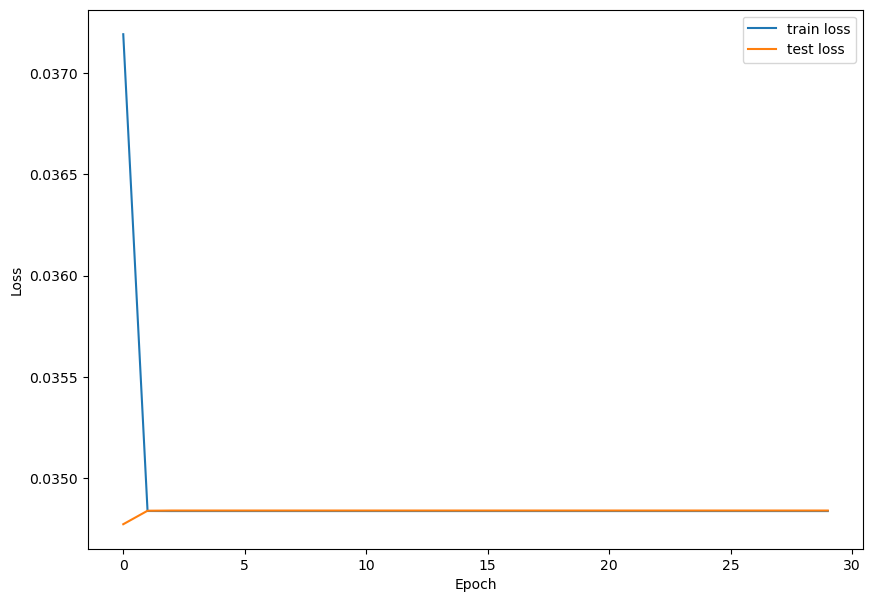

In [74]:
y_pred = model.predict(X_test)

plt.figure(figsize=(10,7))
plt.plot(range(30), model_history.history['loss'], label='train loss')
plt.plot(range(30), model_history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [75]:
model.evaluate(X_test, y_test)

27/27 [==============================] - 0s 2ms/step - loss: 0.0348 - mse: 0.0348


[0.034838780760765076, 0.034838780760765076]